## Covid-19

Дана статистика заболеваемости коронавирусом за определенный промежуток в разных странах, записанная в файл covid-19cases.csv. Необходимо:
Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes).
Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц
Определить корреляцию каждой части света с другой.
Вывести название части света, которая меньше всего коррелирует с другими.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations_with_replacement
%matplotlib inline

df = pd.read_csv('covid-19cases.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105748 entries, 0 to 105747
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       105748 non-null  int64  
 1   date                             105748 non-null  object 
 2   continent                        52269 non-null   object 
 3   location                         52873 non-null   object 
 4   total_cases                      49259 non-null   float64
 5   new_cases                        51979 non-null   float64
 6   new_cases_smoothed               51185 non-null   float64
 7   total_deaths                     40323 non-null   float64
 8   new_deaths                       51979 non-null   float64
 9   new_deaths_smoothed              51185 non-null   float64
 10  total_cases_per_million          48993 non-null   float64
 11  new_cases_per_million            51915 non-null   float64
 12  ne

In [2]:
# Удаляем пустые столбцы и первый столбец, дублирующий индекс, а также строки "for notes".

df.drop(labels = ['Unnamed: 0', 'Unnamed: 40', 'Unnamed: 41'], axis = 1, inplace = True)
df = df[df.date != 'For Notes: ']
df.head()

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0


In [3]:
df.date = pd.to_datetime(df.date)
df['month'] = df.date.dt.month
cases = df.groupby(['continent', 'month'], as_index = False).agg({'new_cases': 'sum'})
cases.head()

,continent,month,new_cases
0,Africa,1,52069.0
1,Africa,2,54791.0
2,Africa,3,56121.0
3,Africa,4,72938.0
4,Africa,5,129485.0


In [4]:
# Расчет коэффициента корреляции Пирсона для каждой пары частей света.

def correlation(df, method):
    x = df.continent.unique()
    combinations =  list(combinations_with_replacement(x, 2))
    res = []
    for c in combinations:
        if c[0] != c[1]:
            res.append((c, method(df[df.continent == c[0]]['new_cases'], 
                                       df[df.continent == c[1]]['new_cases'])))
    return sorted(res, key = lambda x: x[1][0])

correlation(cases, pearsonr)

[(('Africa', 'Europe'), (0.34871703187453523, 0.2666041499222279)),
 (('Europe', 'South America'), (0.3926168769357289, 0.20679066373751245)),
 (('Europe', 'Oceania'), (0.4747553091046616, 0.11885614361756608)),
 (('Asia', 'Oceania'), (0.5595944387817728, 0.058505150347867)),
 (('Europe', 'North America'), (0.5637992507937503, 0.05623351253243564)),
 (('Asia', 'Europe'), (0.5799700502961929, 0.048070213209253504)),
 (('Oceania', 'South America'), (0.5950246786242922, 0.04125565184715898)),
 (('Africa', 'Oceania'), (0.6672030344461669, 0.017774706659683132)),
 (('North America', 'Oceania'), (0.713033511632602, 0.009238114112288826)),
 (('Africa', 'Asia'), (0.7682924507110457, 0.003511070748502331)),
 (('Asia', 'North America'), (0.8547820801683523, 0.00039649373769014073)),
 (('North America', 'South America'),
  (0.9081581687707727, 4.4034089294931155e-05)),
 (('Africa', 'South America'), (0.9119549561036289, 3.588856989612952e-05)),
 (('Asia', 'South America'), (0.9126408283278054, 3.

In [17]:
# Сводная таблица для построения корреляционной матрицы

cases_pivot = pd.pivot_table(cases, index=['month'], columns=['continent'])
cases_pivot

new_cases                                                          
continent    Africa       Asia     Europe North America Oceania South America
month                                                                        
1           52069.0   431212.0   201780.0      320756.0  1135.0      305484.0
2           54791.0   451889.0   205499.0      340543.0  1355.0      315538.0
3           56121.0   479418.0   623715.0      504776.0  6633.0      319164.0
4           72938.0   627885.0   676974.0      892278.0  2068.0      401833.0
5          129485.0   843758.0   564440.0      850231.0  1251.0      825677.0
6          228885.0  1169582.0   478571.0     1040673.0  2107.0     1158879.0
7          384839.0  1741392.0   542591.0     1809410.0  7826.0     1462462.0
8          237036.0  2220417.0   766253.0     1384964.0  6555.0     1646173.0
9          191598.0  2594550.0  1228106.0     1268567.0  2915.0     1303077.0
10         211676.0  1839369.0  2814647.0     1450785.0  6286.0     1041024.0
11          56107.0   443413.0   267455.0      342495.0  1028.0      304372.0
12          54166.0   436850.0   251662.0      322947.0   893.0      312545.0

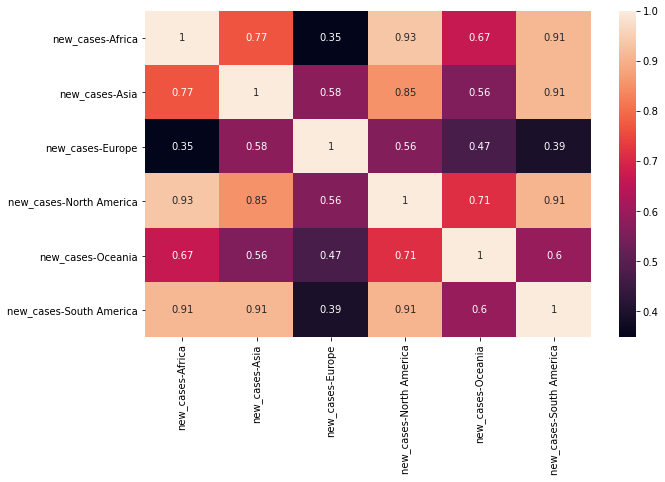

In [20]:
# Корреляционная матрица

plt.figure(figsize=(10, 6))
sns.heatmap(cases_pivot.corr(), annot=True)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [23]:
corr = cases_pivot.corr()
corr['sum'] = np.sum(corr)
corr

new_cases                                              \
continent                  Africa      Asia    Europe North America   Oceania   
          continent                                                             
new_cases Africa         1.000000  0.768292  0.348717      0.934301  0.667203   
          Asia           0.768292  1.000000  0.579970      0.854782  0.559594   
          Europe         0.348717  0.579970  1.000000      0.563799  0.474755   
          North America  0.934301  0.854782  0.563799      1.000000  0.713034   
          Oceania        0.667203  0.559594  0.474755      0.713034  1.000000   
          South America  0.911955  0.912641  0.392617      0.908158  0.595025   

                                            sum  
continent               South America            
          continent                              
new_cases Africa             0.911955  4.630468  
          Asia               0.912641  4.675280  
          Europe             0.392617  3.359859  
          North America      0.908158  4.974074  
          Oceania            0.595025  4.009611  
          South America      1.000000  4.720396

In [71]:
# Рассчитаем коэффициент корреляции для каждой части света с остальными (суммарно).

def correlation_total(df, method):
    x = df.continent.unique()
    res = []
    for c in x:
        other_world = df[df.continent != c].groupby('month', as_index = False).agg({'new_cases': 'sum'})
        res.append((c, method(df[df.continent == c]['new_cases'], other_world['new_cases'])))
    return sorted(res, key = lambda x: x[1][0])

correlation_total(cases, pearsonr)

[('Europe', (0.5344829642610464, 0.07341335408606121)),
 ('Oceania', (0.6605465607118911, 0.01937748861881424)),
 ('Africa', (0.81254484654608, 0.0013182598913770696)),
 ('South America', (0.8412536940285416, 0.000604316862000397)),
 ('Asia', (0.8902957925542092, 0.0001038150218034176)),
 ('North America', (0.894898687029378, 8.446124129834864e-05))]

По сумме корреляций с другими частями света по отдельности, и по корреляции с остальными частями света суммарно меньше всего с другими частями света коррелирует Европа.